<a href="https://colab.research.google.com/github/ShotaSasaki-HCU/Kaggle_House-Prices-Regression/blob/main/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime
import pytz

import matplotlib.pyplot as plt
# import seaborn as sns

from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Adding Training and Testing

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/practical_AI-tech/house-prices-advanced-regression-techniques/train.csv', encoding='utf-8')
df_test = pd.read_csv('/content/drive/MyDrive/practical_AI-tech/house-prices-advanced-regression-techniques/test.csv', encoding='utf-8')
df_submission = pd.read_csv('/content/drive/MyDrive/practical_AI-tech/house-prices-advanced-regression-techniques/sample_submission.csv', encoding='utf-8')

# Numeric Data Exploration

In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df_train.describe()
# which will help us with our numerical data.

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Displays the data type of the columns in the data frame
# Now display for columns that are not objects and contain numbers
df_train.dtypes[df_train.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

## MSSubClass
MSSubClass: The building class

This is honestly more of a like categorical value.
I don't know why they put this as numeric.

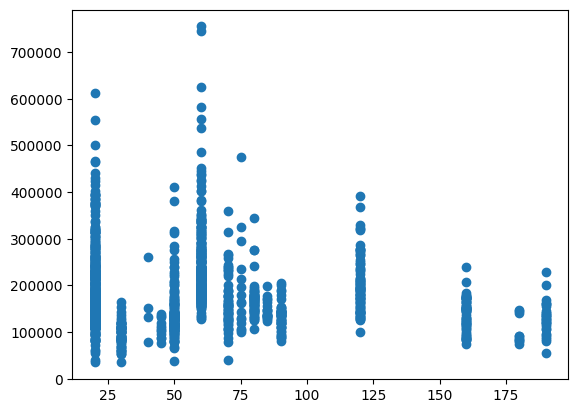

In [ ]:
# plt.scatter(x='MSSubClass', y='SalePrice', data=df_train)

## LotFrontage

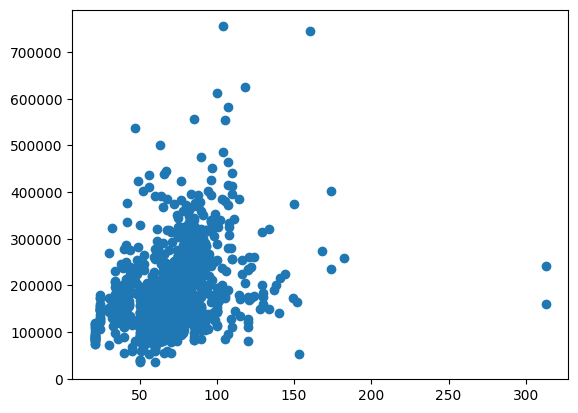

In [ ]:
# plt.scatter(x='LotFrontage', y='SalePrice', data=df_train)

In [ ]:
df_train.query('LotFrontage > 300')
# Drop 935, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


## LotArea

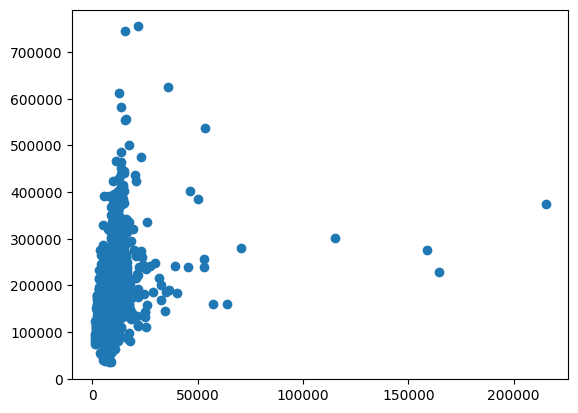

In [ ]:
# plt.scatter(x='LotArea', y='SalePrice', data=df_train)

In [ ]:
df_train.query('LotArea > 55000')
# Drop 250, 314, 336, 707
# maybe 1397

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


### Z-score
The z-score is a value obtained by transforming the scores of the data so that the mean is 0 and the standard deviation is 1. This gives the relative position in the data. Outlier detection by z-score is determined by the significance level. A significance level of -2 to 2 means that 95.45% of the data are non-outliers, while a significance level of -3 to 3 means that 99.73% of the data are non-outliers.

In [ ]:
stats.zscore(df_train['LotArea']).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

## OverallQual

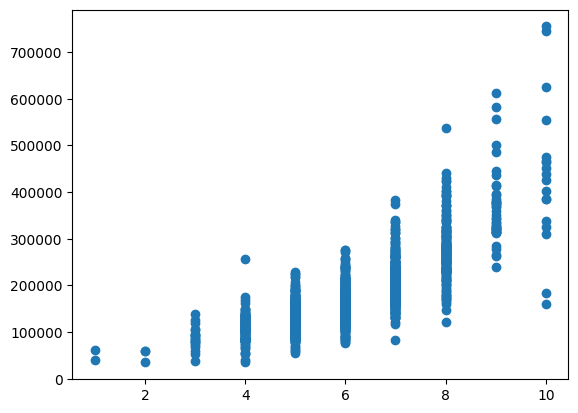

In [ ]:
# plt.scatter(x='OverallQual', y='SalePrice', data=df_train)

In [ ]:
df_train.query('OverallQual == 10').sort_values('SalePrice')
# maybe 524

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1442,1443,60,FV,85.0,11003,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,310000
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
994,995,20,RL,96.0,12456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,337500
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780


## OverallCond

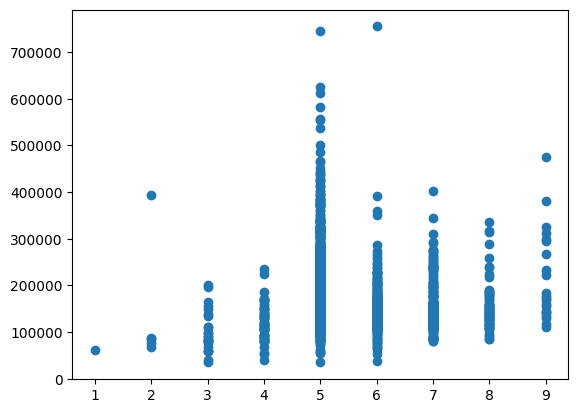

In [ ]:
# plt.scatter(x='OverallCond', y='SalePrice', data=df_train)

In [ ]:
df_train.query('OverallCond == 2').sort_values('SalePrice')
# Drop 379

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432


In [ ]:
df_train.query('OverallCond == 5 & SalePrice > 700000')
# Drop 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [ ]:
df_train.query('OverallCond == 6 & SalePrice > 700000')
# Drop 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


## YearBuilt (Drop Later)

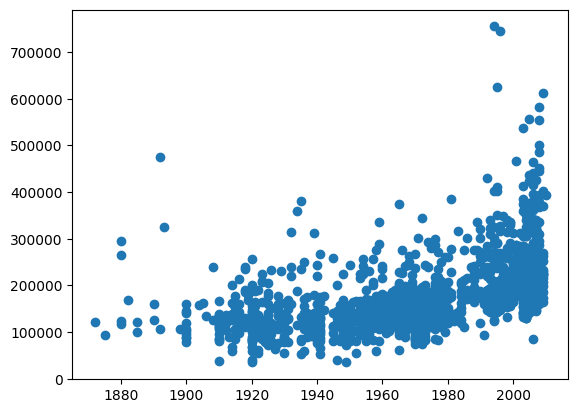

In [ ]:
# plt.scatter(x='YearBuilt', y='SalePrice', data=df_train)

In [ ]:
df_train.query('YearBuilt < 1900 & SalePrice > 400000')
# Drop 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


## YearRemodAdd (Drop Later)

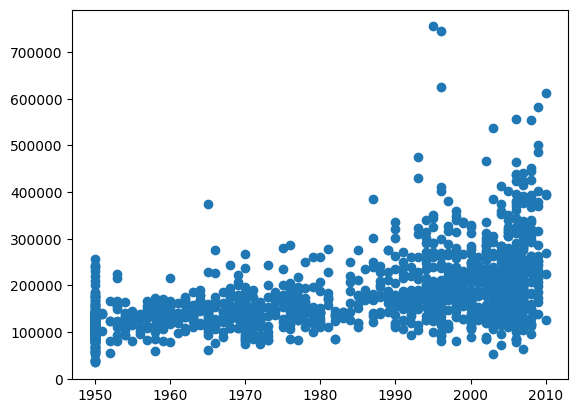

In [ ]:
# plt.scatter(x='YearRemodAdd', y='SalePrice', data=df_train)

In [ ]:
df_train.query('YearRemodAdd < 1970 & SalePrice > 300000')
# Drop 314

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


## MasVnrArea

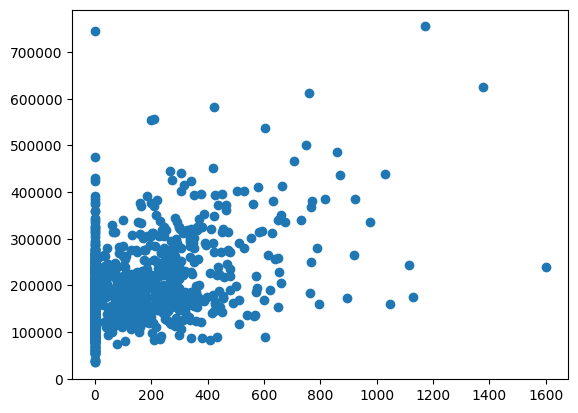

In [ ]:
# plt.scatter(x='MasVnrArea', y='SalePrice', data=df_train)

In [ ]:
df_train.query('MasVnrArea > 1500')
# Drop 298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


## BsmtFinSF1 (Drop Later)

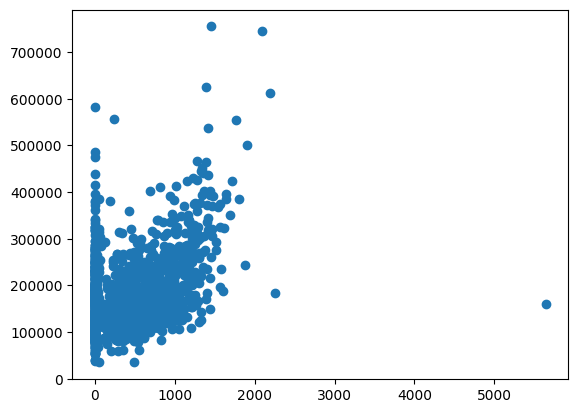

In [ ]:
# plt.scatter(x='BsmtFinSF1', y='SalePrice', data=df_train)

In [ ]:
df_train.query('BsmtFinSF1 > 5000')
# What a shocker, 1299.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


## BsmtFinSF2 (Drop Later)
BsmtFinSF2: Type 2 finished square feet

It's very descriptive. I don't know what that means.

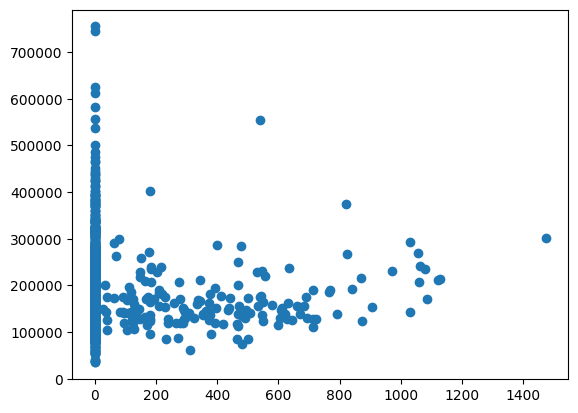

In [ ]:
# plt.scatter(x='BsmtFinSF2', y='SalePrice', data=df_train)

In [ ]:
df_train.query('BsmtFinSF2 > 400 & SalePrice > 500000')
# Drop 441

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


## BsmtUnfSF

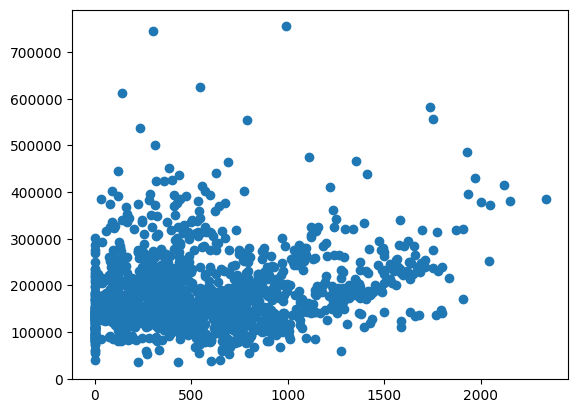

In [ ]:
# plt.scatter(x='BsmtUnfSF', y='SalePrice', data=df_train)

## TotalBsmtSF (Drop Later)

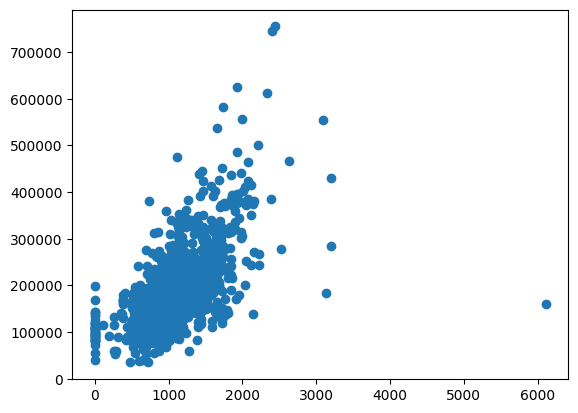

In [ ]:
# plt.scatter(x='TotalBsmtSF', y='SalePrice', data=df_train)

In [ ]:
df_train.query('TotalBsmtSF > 5000')
# Shocker! Shocker, I tell you.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


## 1stFlrSF (Drop Later)

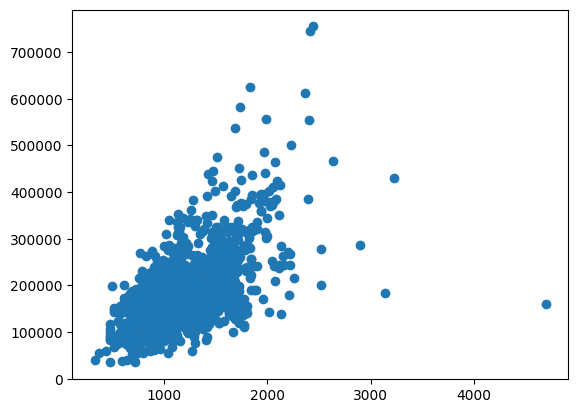

In [ ]:
# plt.scatter(x='1stFlrSF', y='SalePrice', data=df_train)

In [ ]:
# The column name begins with a numeral and must be enclosed in backquotes.
df_train.query('`1stFlrSF` > 4000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


## 2ndFlrSF (Drop Later)

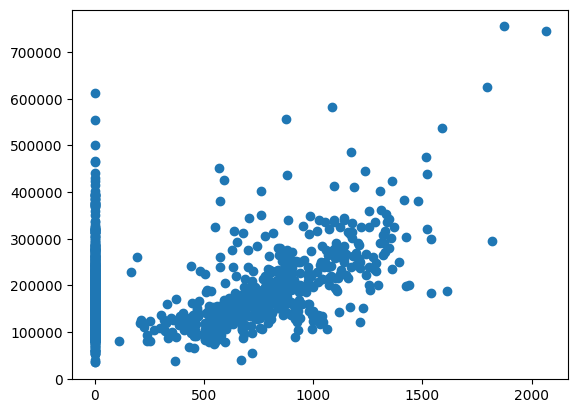

In [ ]:
# plt.scatter(x='2ndFlrSF', y='SalePrice', data=df_train)

## LowQualFinSF

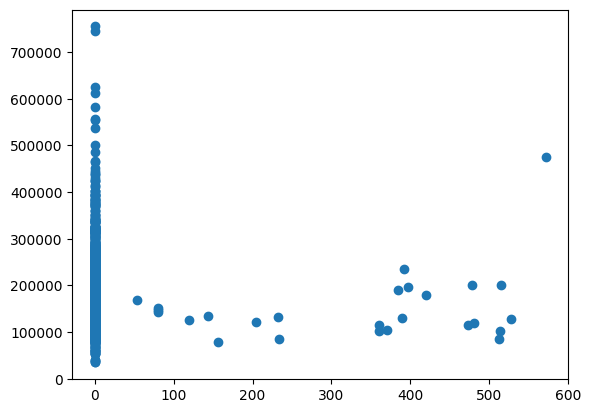

In [ ]:
# plt.scatter(x='LowQualFinSF', y='SalePrice', data=df_train)

In [ ]:
df_train.query('LowQualFinSF > 500 & SalePrice > 400000')
# Drop 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


## GrLivArea (Drop Later)

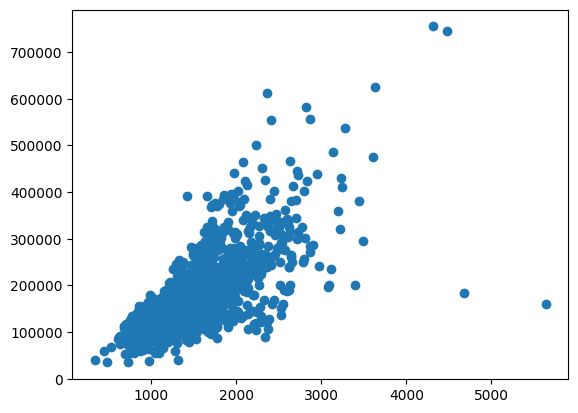

In [ ]:
# plt.scatter(x='GrLivArea', y='SalePrice', data=df_train)

In [ ]:
df_train.query('GrLivArea > 4000 & SalePrice < 300000')
# Drop 524, shocker

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


## BsmtFullBath (Drop Later)

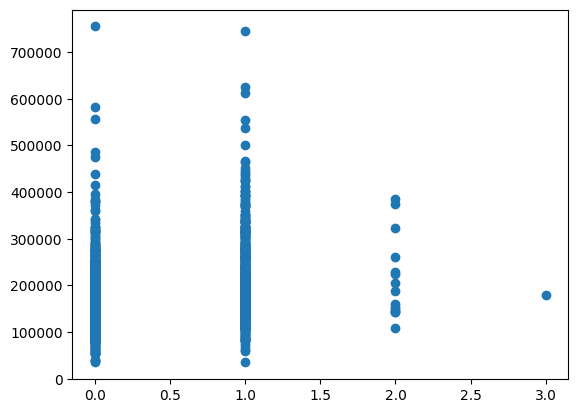

In [ ]:
# plt.scatter(x='BsmtFullBath', y='SalePrice', data=df_train)

In [ ]:
df_train.query('BsmtFullBath == 3')
# Drop 739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


## BsmtHalfBath (Drop Later)

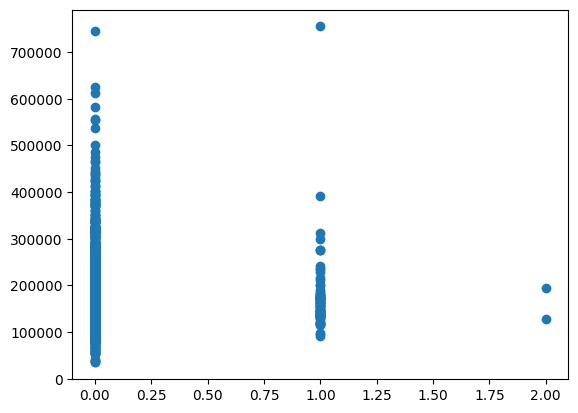

In [ ]:
# plt.scatter(x='BsmtHalfBath', y='SalePrice', data=df_train)

### Z-score

In [ ]:
# df_temp = stats.zscore(df_train['BsmtHalfBath'])
# df_temp[df_train['BsmtHalfBath'] == 2]
stats.zscore(df_train['BsmtHalfBath']).unique()

array([-0.24106104,  3.94880935,  8.13867973])

In [ ]:
df_train.query('BsmtHalfBath == 2')
# Drop 598, 955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


## FullBath (Drop Later)

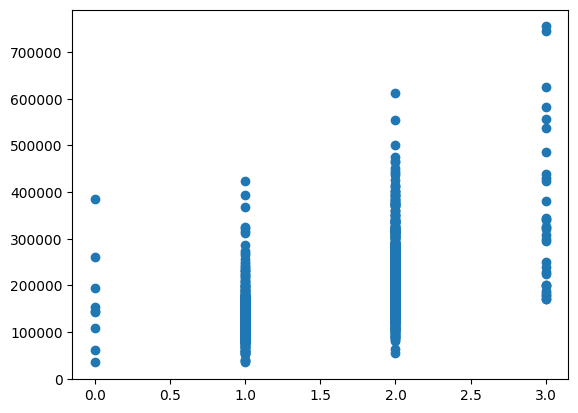

In [ ]:
# plt.scatter(x='FullBath', y='SalePrice', data=df_train)

## HalfBath (Drop Later)

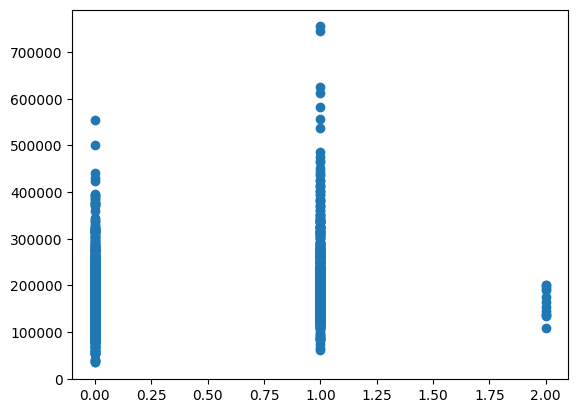

In [ ]:
# plt.scatter(x='HalfBath', y='SalePrice', data=df_train)

## BedroomAbvGr

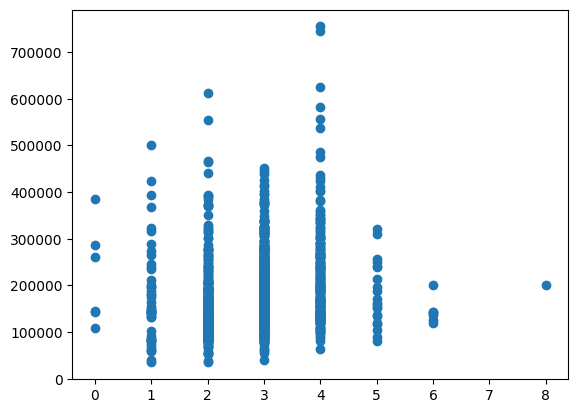

In [ ]:
# plt.scatter(x='BedroomAbvGr', y='SalePrice', data=df_train)

In [ ]:
df_train.query('BedroomAbvGr == 8')
# Drop 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


## KitchenAbvGr

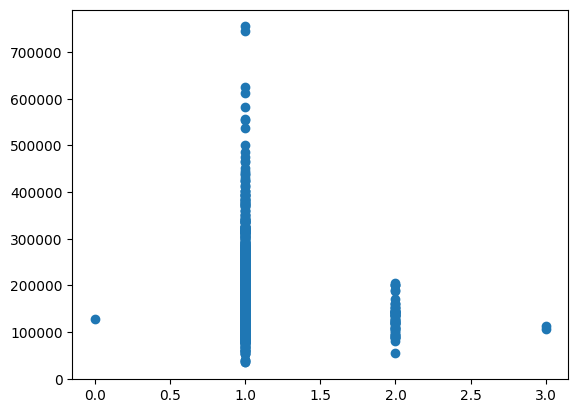

In [ ]:
# plt.scatter(x='KitchenAbvGr', y='SalePrice', data=df_train)

### Z-score

In [ ]:
# stats.zscore(df_train['KitchenAbvGr']).unique()
# -> array([-0.21145358,  4.32857919,  8.86861196, -4.75148635])

df_temp = stats.zscore(df_train['KitchenAbvGr'])
df_temp[df_train['KitchenAbvGr'] == 3]

48     8.868612
809    8.868612
Name: KitchenAbvGr, dtype: float64

In [ ]:
df_train.query('KitchenAbvGr == 3')
# Drop 49, 810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


## TotRmsAbvGrd

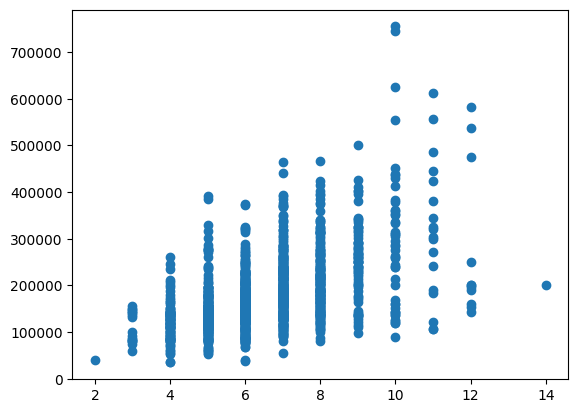

In [ ]:
# plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=df_train)

In [ ]:
df_train.query('TotRmsAbvGrd == 14')
# Drop 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


## Fireplaces

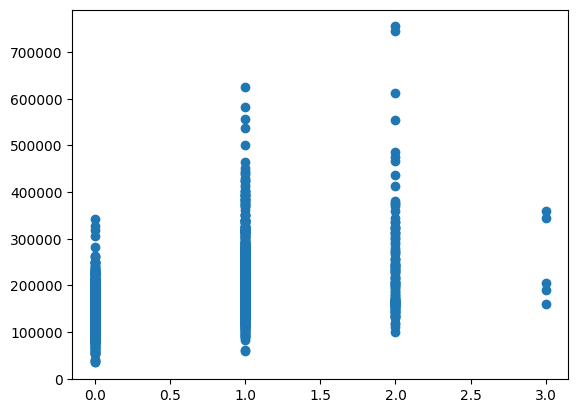

In [ ]:
# plt.scatter(x='Fireplaces', y='SalePrice', data=df_train)

## GarageYrBlt

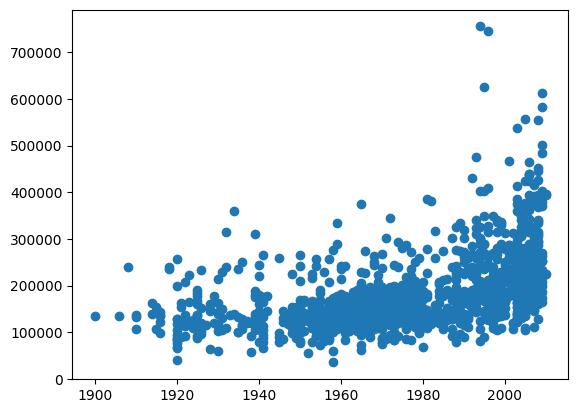

In [ ]:
# plt.scatter(x='GarageYrBlt', y='SalePrice', data=df_train)

## GarageCars

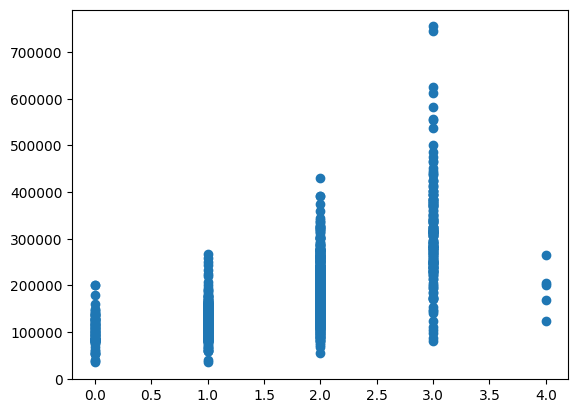

In [ ]:
# plt.scatter(x='GarageCars', y='SalePrice', data=df_train)

## GarageArea (Drop Later)

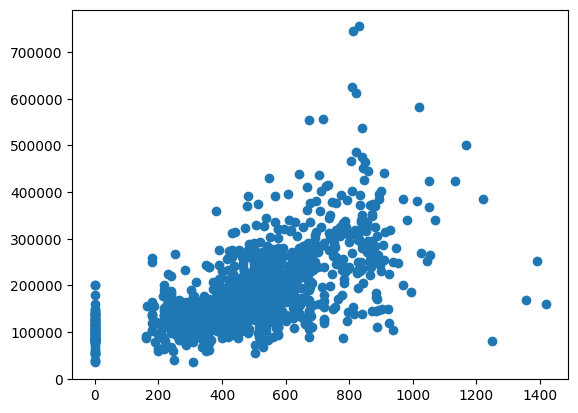

In [ ]:
# plt.scatter(x='GarageArea', y='SalePrice', data=df_train)

In [ ]:
df_train.query('GarageArea > 1200')
# Drop 1062, 1191

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


## WoodDeckSF (Drop Later)

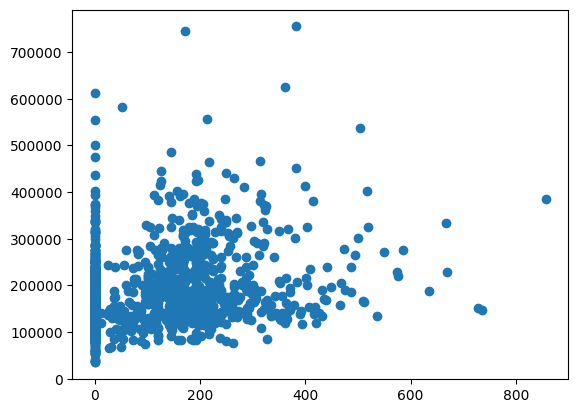

In [ ]:
# plt.scatter(x='WoodDeckSF', y='SalePrice', data=df_train)

## OpenPorchSF (Drop Later)

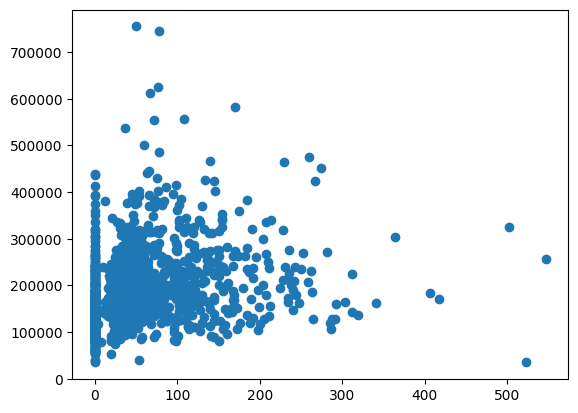

In [ ]:
# plt.scatter(x='OpenPorchSF', y='SalePrice', data=df_train)

In [ ]:
df_train.query('SalePrice < 100000 & OpenPorchSF > 500')
# Drop 496

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900


## EnclosedPorch (Drop Later)

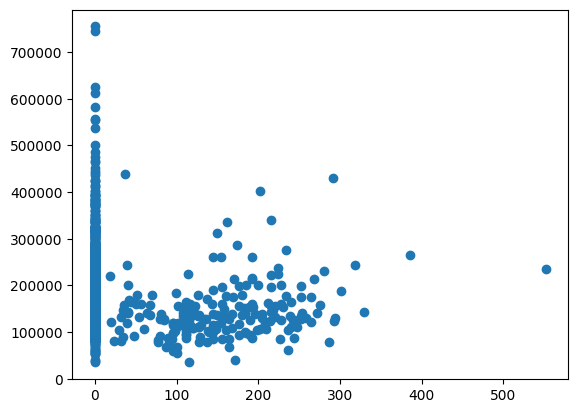

In [ ]:
# plt.scatter(x='EnclosedPorch', y='SalePrice', data=df_train)

### Z-score

In [ ]:
stats.zscore(df_train['EnclosedPorch']).sort_values().tail(10)

1152    4.223460
1326    4.321663
496     4.403498
630     4.436233
358     4.452600
1360    4.567169
939     4.845410
1197    5.041815
747     5.958372
197     8.675309
Name: EnclosedPorch, dtype: float64

In [ ]:
df_train.query('EnclosedPorch > 500')
# Drop 198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


## 3SsnPorch (Drop Later)

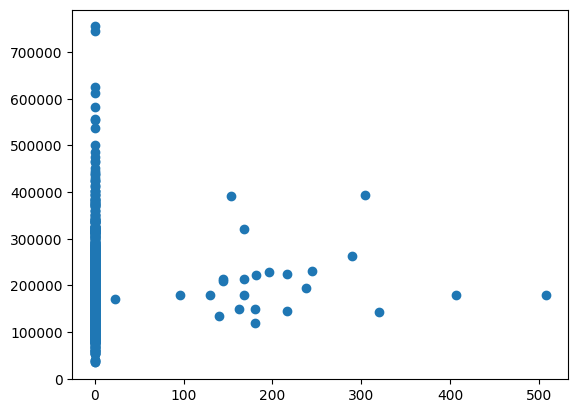

In [ ]:
# plt.scatter(x='3SsnPorch', y='SalePrice', data=df_train)

## ScreenPorch (Drop Later)

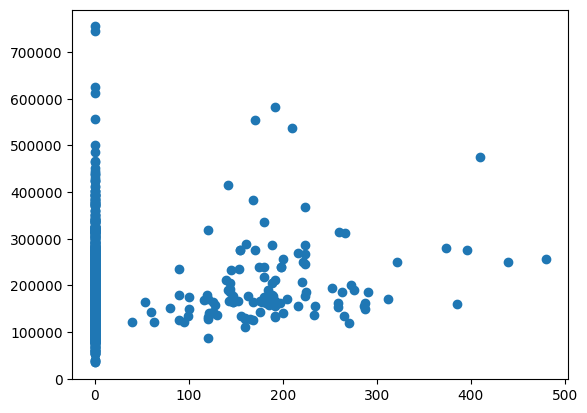

In [ ]:
# plt.scatter(x='ScreenPorch', y='SalePrice', data=df_train)

## PoolArea

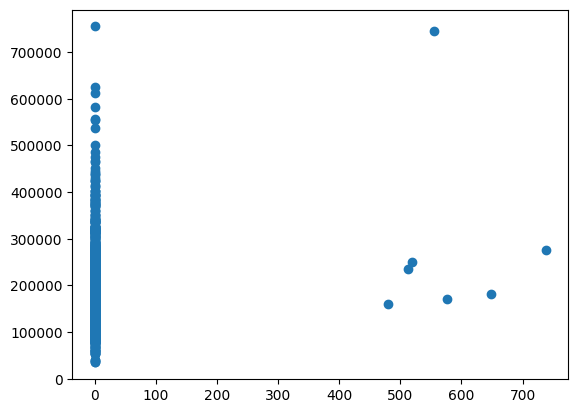

In [ ]:
# plt.scatter(x='PoolArea', y='SalePrice', data=df_train)

In [ ]:
stats.zscore(df_train['PoolArea']).sort_values().tail(10)

479     -0.068692
478     -0.068692
485     -0.068692
1298    11.882444
197     12.679187
1386    12.853474
1182    13.749810
1170    14.272672
810     16.065342
1423    18.306180
Name: PoolArea, dtype: float64

## MiscVal (Drop)
MiscVal: Value of miscellaneous feature

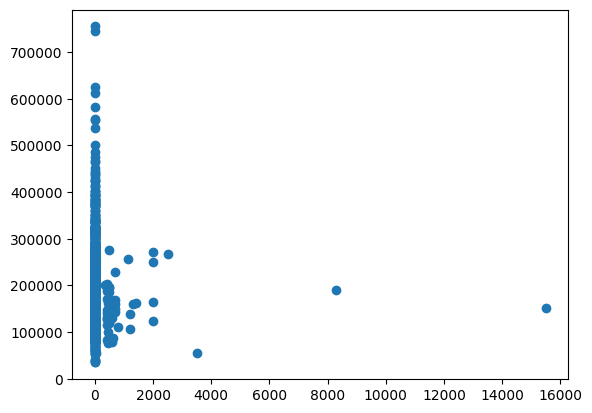

In [ ]:
# plt.scatter(x='MiscVal', y='SalePrice', data=df_train)

## MoSold (Drop)

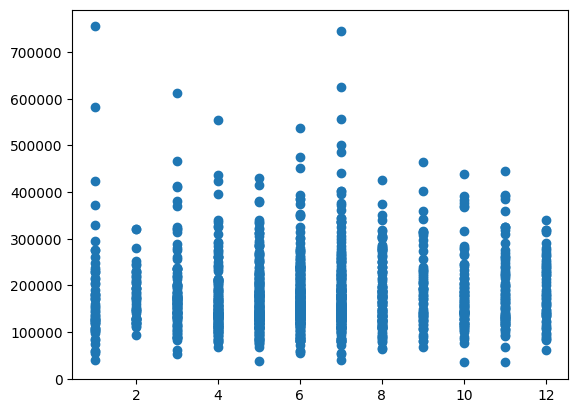

In [ ]:
# plt.scatter(x='MoSold', y='SalePrice', data=df_train)

## YrSold (Drop Later)

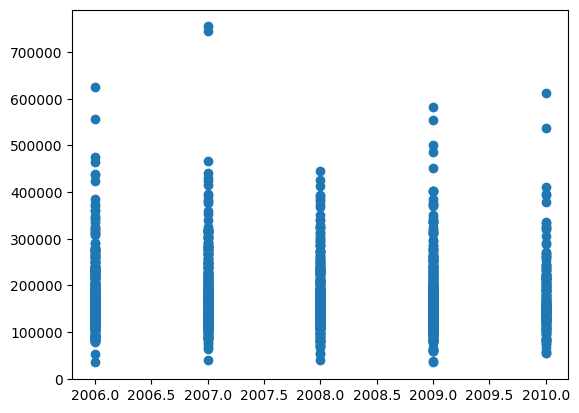

In [ ]:
# plt.scatter(x='YrSold', y='SalePrice', data=df_train)

## ★Outliers

In [ ]:
values = [935, 1299, 250, 314, 336, 707, 1397, 524, 379, 1183, 692, 186, 298, 441, 739, 598, 955, 636, 49, 810, 1062, 1191, 496, 198]
print(len(values))
# Remove duplicate elements
values = list(set(values))
print(len(values))

24
24


In [ ]:
df_train = df_train[df_train.Id.isin(values) == False]

## ★Dropping columns
Some are not dropped now for use in feature engineering.

In [ ]:
df_train = df_train.drop(columns=['MiscVal', 'MoSold'])
df_test = df_test.drop(columns=['MiscVal', 'MoSold'])

# Null Values

In [ ]:
pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1432
MiscFeature,1385
Alley,1347
Fence,1160
MasVnrType,859
FireplaceQu,683
LotFrontage,254
GarageYrBlt,76
GarageCond,76
GarageType,76


In [ ]:
pd.DataFrame(df_test.isnull().sum().sort_values(ascending=False)).head(35)

,0
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
MasVnrType,894
FireplaceQu,730
LotFrontage,227
GarageYrBlt,78
GarageFinish,78
GarageQual,78


## PoolQC (Drop)

## MiscFeature (Drop)

In [ ]:
df_train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

## Alley (Drop)

In [ ]:
df_train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['Alley'].fillna('No', inplace=True)
df_test['Alley'].fillna('No', inplace=True)

Box Plot: https://pygraph.helve-blog.com/seaborn/catplot#id6

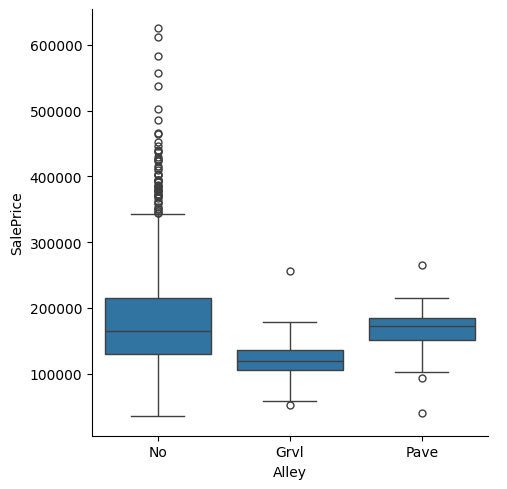

In [ ]:
# sns.catplot(data=df_train, x='Alley', y='SalePrice', kind='box')

In [ ]:
df_train.query('Alley == "Grvl"').count()

Id               50
MSSubClass       50
MSZoning         50
LotFrontage      47
LotArea          50
                 ..
MiscFeature       4
YrSold           50
SaleType         50
SaleCondition    50
SalePrice        50
Length: 79, dtype: int64

## Fence (Drop)

In [ ]:
df_train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['Fence'].fillna('No', inplace=True)
df_test['Fence'].fillna('No', inplace=True)

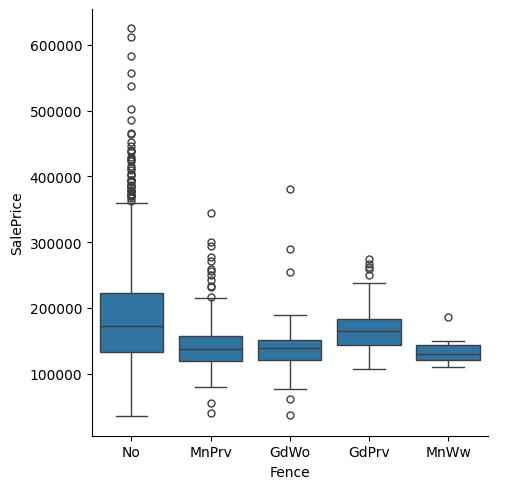

In [ ]:
# sns.catplot(data=df_train, x='Fence', y='SalePrice', kind='box')
# No fence actually perform better than the ones with fence!

## MasVnrType

In [ ]:
df_train['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['MasVnrType'].fillna('No', inplace=True)
df_test['MasVnrType'].fillna('No', inplace=True)

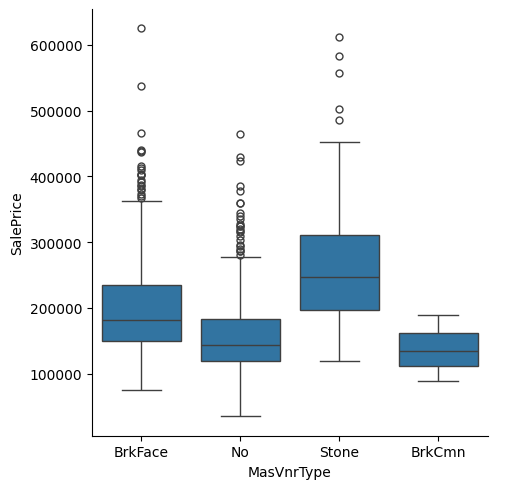

In [ ]:
# sns.catplot(data=df_train, x='MasVnrType', y='SalePrice', kind='box')

## MasVnrArea (numerical)

In [ ]:
df_train['MasVnrArea'].head(10).unique()

array([196.,   0., 162., 350., 186., 240.])

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['MasVnrArea'].fillna(0, inplace=True)
df_test['MasVnrArea'].fillna(0, inplace=True)

## FireplaceQu

In [ ]:
df_train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['FireplaceQu'].fillna('No', inplace=True)
df_test['FireplaceQu'].fillna('No', inplace=True)

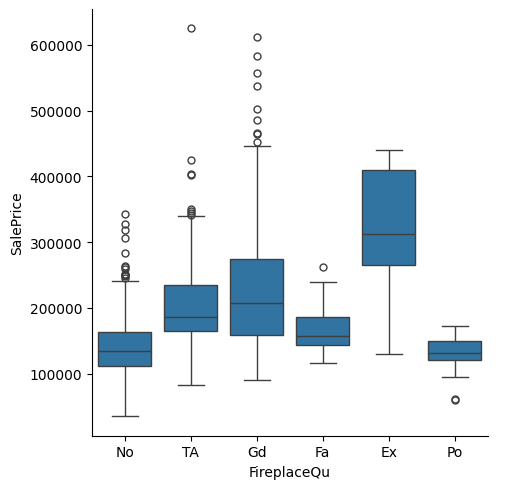

In [ ]:
# sns.catplot(data=df_train, x='FireplaceQu', y='SalePrice', kind='box')

### Fireplaces (FYI)
for your information

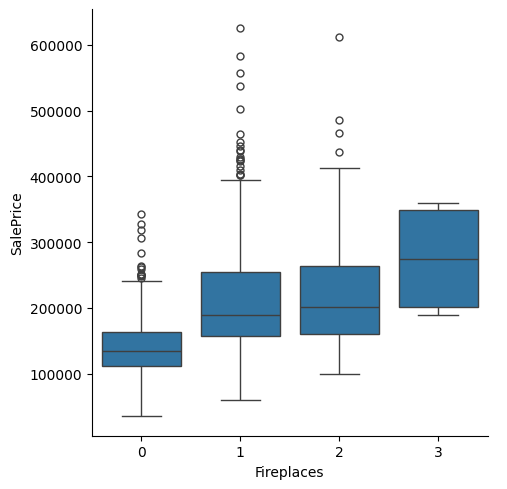

In [ ]:
# sns.catplot(data=df_train, x='Fireplaces', y='SalePrice', kind='box')

## LotFrontage

In [ ]:
df_train['LotFrontage'].head(10).unique()

array([65., 80., 68., 60., 84., 85., 75., nan, 51., 50.])

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['LotFrontage'].fillna(0, inplace=True)
df_test['LotFrontage'].fillna(0, inplace=True)

## GarageYrBlt (Drop)
There is a pretty strong correlation between 'yearBuilt' and 'GarageYrBlt' with a correlation coefficient of 0.82, so I determine that 'GarageYrBlt' does not need to be used.

In [ ]:
df_train['GarageYrBlt'].corr(df_train['YearBuilt'])

0.8280069030450472

## GarageCond (Drop)

In [ ]:
df_train['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['GarageCond'].fillna('No', inplace=True)
df_test['GarageCond'].fillna('No', inplace=True)

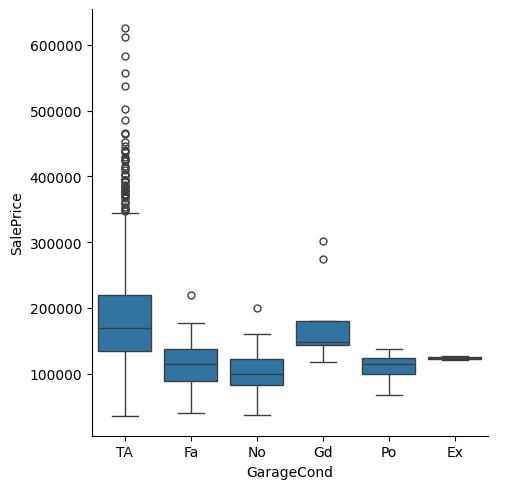

In [ ]:
# sns.catplot(data=df_train, x='GarageCond', y='SalePrice', kind='box')

## GarageType

In [ ]:
df_train['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['GarageType'].fillna('No', inplace=True)
df_test['GarageType'].fillna('No', inplace=True)

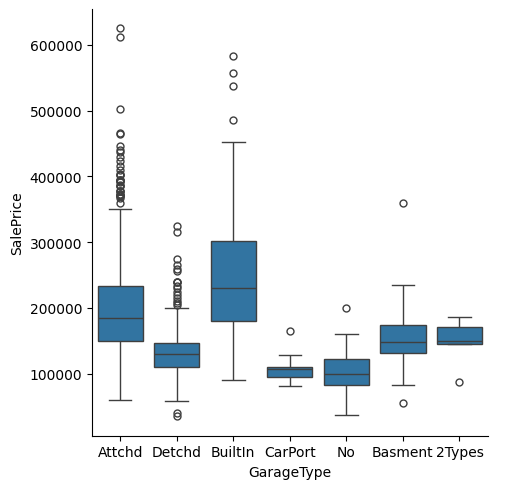

In [ ]:
# sns.catplot(data=df_train, x='GarageType', y='SalePrice', kind='box')

## GarageFinish
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished
       Unf	Unfinished
       NA	No Garage

In [ ]:
df_train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['GarageFinish'].fillna('No', inplace=True)
df_test['GarageFinish'].fillna('No', inplace=True)

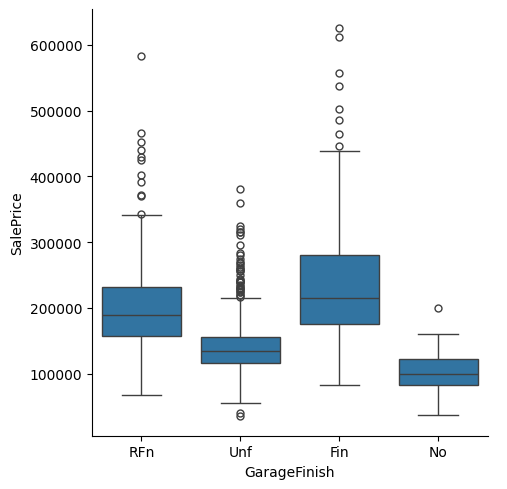

In [ ]:
# sns.catplot(data=df_train, x='GarageFinish', y='SalePrice', kind='box')

## GarageQual

In [ ]:
df_train['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['GarageQual'].fillna('No', inplace=True)
df_test['GarageQual'].fillna('No', inplace=True)

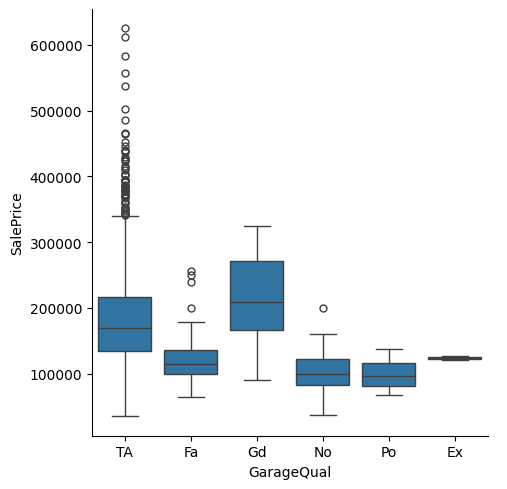

In [ ]:
# sns.catplot(data=df_train, x='GarageQual', y='SalePrice', kind='box')

## BsmtFinType2 (Drop)
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [ ]:
df_train['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['BsmtFinType2'].fillna('Unf', inplace=True)
df_test['BsmtFinType2'].fillna('Unf', inplace=True)

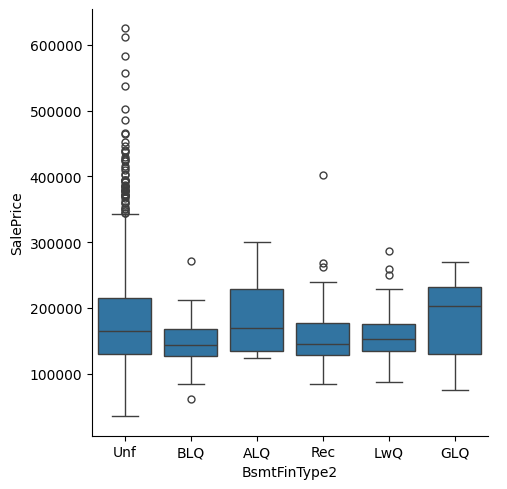

In [ ]:
# sns.catplot(data=df_train, x='BsmtFinType2', y='SalePrice', kind='box')

## BsmtExposure
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [ ]:
df_train['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['BsmtExposure'].fillna('NoBsmt', inplace=True)
df_test['BsmtExposure'].fillna('NoBsmt', inplace=True)

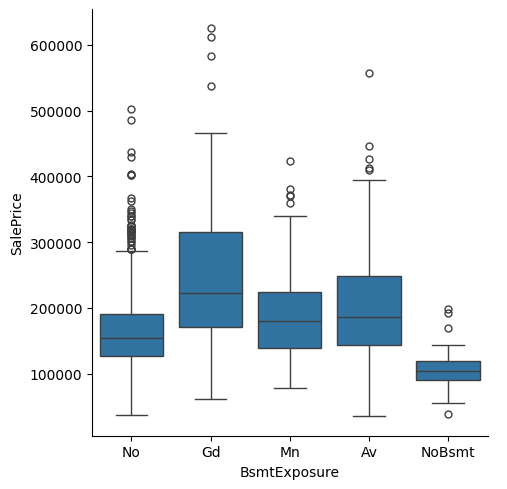

In [ ]:
# sns.catplot(data=df_train, x='BsmtExposure', y='SalePrice', kind='box')

## BsmtQual
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement

In [ ]:
df_train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['BsmtQual'].fillna('No', inplace=True)
df_test['BsmtQual'].fillna('No', inplace=True)

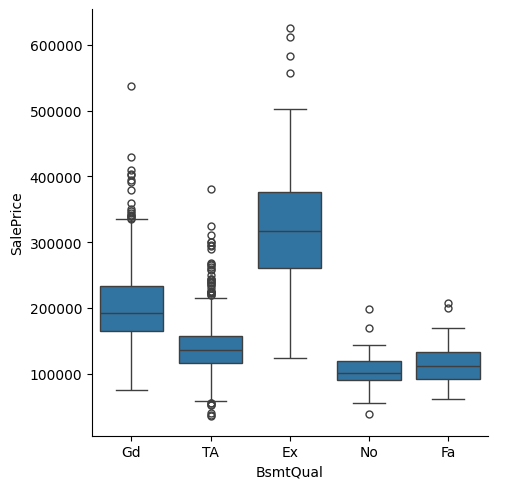

In [ ]:
# sns.catplot(data=df_train, x='BsmtQual', y='SalePrice', kind='box')

## BsmtCond

In [ ]:
df_train['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['BsmtCond'].fillna('No', inplace=True)
df_test['BsmtCond'].fillna('No', inplace=True)

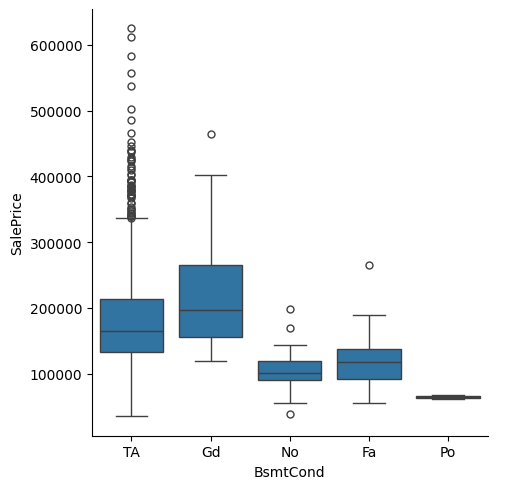

In [ ]:
# sns.catplot(data=df_train, x='BsmtCond', y='SalePrice', kind='box')

## BsmtFinType1

In [ ]:
df_train['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['BsmtFinType1'].fillna('No', inplace=True)
df_test['BsmtFinType1'].fillna('No', inplace=True)

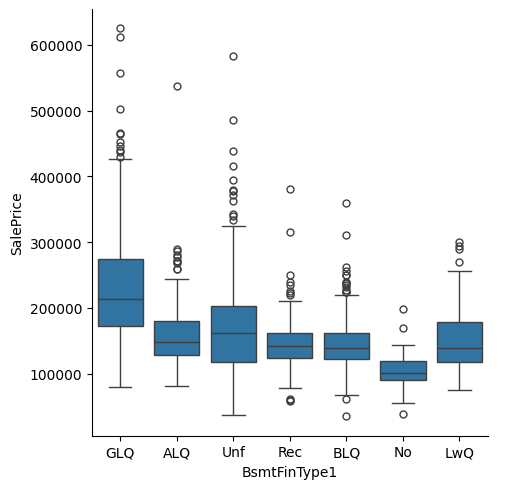

In [ ]:
# sns.catplot(data=df_train, x='BsmtFinType1', y='SalePrice', kind='box')

## Electrical
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [ ]:
df_train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['Electrical'].fillna('SBrkr', inplace=True)
df_test['Electrical'].fillna('SBrkr', inplace=True)

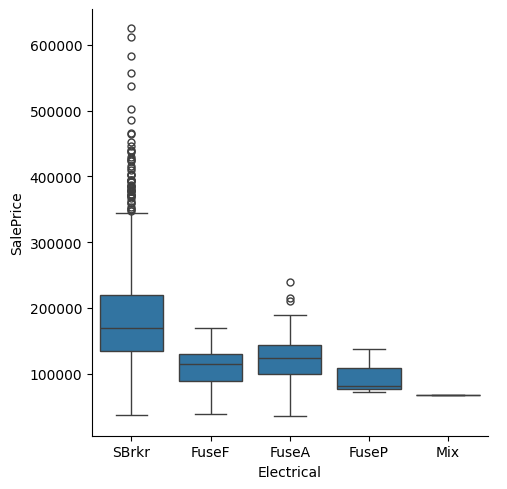

In [ ]:
# sns.catplot(data=df_train, x='Electrical', y='SalePrice', kind='box')

## Exterior1st

In [ ]:
print(df_train['Exterior1st'].unique())
print(df_train['Exterior1st'].isnull().sum())
print(df_test['Exterior1st'].unique())
print(df_test['Exterior1st'].isnull().sum())

['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
0
['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock']
1


In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['Exterior1st'].fillna('Other', inplace=True)
df_test['Exterior1st'].fillna('Other', inplace=True)

## Exterior2nd

In [ ]:
print(df_train['Exterior2nd'].unique())
print(df_train['Exterior2nd'].isnull().sum())
print(df_test['Exterior2nd'].unique())
print(df_test['Exterior2nd'].isnull().sum())

['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
0
['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone']
1


In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['Exterior2nd'].fillna('Other', inplace=True)
df_test['Exterior2nd'].fillna('Other', inplace=True)

## SaleType

In [ ]:
print(df_train['SaleType'].unique())
print(df_train['SaleType'].isnull().sum())
print(df_test['SaleType'].unique())
print(df_test['SaleType'].isnull().sum())

['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
0
['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' 'ConLI' 'CWD' nan]
1


In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['SaleType'].fillna('Oth', inplace=True)
df_test['SaleType'].fillna('Oth', inplace=True)

## MSZoning

In [ ]:
print(df_train['MSZoning'].unique())
print(df_train['MSZoning'].isnull().sum())
print(df_test['MSZoning'].unique())
print(df_test['MSZoning'].isnull().sum())

['RL' 'RM' 'C (all)' 'FV' 'RH']
0
['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
4


In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['MSZoning'].fillna('No', inplace=True)
df_test['MSZoning'].fillna('No', inplace=True)

## BsmtHalfBath (numerical)

In [ ]:
df_train['BsmtHalfBath'].unique()

array([0, 1])

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['BsmtHalfBath'].fillna(0, inplace=True)
df_test['BsmtHalfBath'].fillna(0, inplace=True)

## BsmtFullBath (numerical)

In [ ]:
df_train['BsmtFullBath'].unique()

array([1, 0, 2])

In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['BsmtFullBath'].fillna(0, inplace=True)
df_test['BsmtFullBath'].fillna(0, inplace=True)

## Functional

In [ ]:
print(df_train['Functional'].unique())
print(df_train['Functional'].isnull().sum())
print(df_test['Functional'].unique())
print(df_test['Functional'].isnull().sum())

['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
0
['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2' nan]
2


In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['Functional'].fillna('No', inplace=True)
df_test['Functional'].fillna('No', inplace=True)

## Utilities

In [ ]:
print(df_train['Utilities'].unique())
print(df_train['Utilities'].isnull().sum())
print(df_test['Utilities'].unique())
print(df_test['Utilities'].isnull().sum())

['AllPub' 'NoSeWa']
0
['AllPub' nan]
2


In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['Utilities'].fillna('No', inplace=True)
df_test['Utilities'].fillna('No', inplace=True)

## KitchenQual

In [ ]:
print(df_train['KitchenQual'].unique())
print(df_train['KitchenQual'].isnull().sum())
print(df_test['KitchenQual'].unique())
print(df_test['KitchenQual'].isnull().sum())

['Gd' 'TA' 'Ex' 'Fa']
0
['TA' 'Gd' 'Ex' 'Fa' nan]
1


In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['KitchenQual'].fillna('No', inplace=True)
df_test['KitchenQual'].fillna('No', inplace=True)

## GarageCars (numerical)

In [ ]:
print(df_train['GarageCars'].unique())
print(df_train['GarageCars'].isnull().sum())
print(df_test['GarageCars'].unique())
print(df_test['GarageCars'].isnull().sum())

[2 3 1 0 4]
0
[ 1.  2.  3.  0.  4.  5. nan]
1


In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['GarageCars'].fillna(0, inplace=True)
df_test['GarageCars'].fillna(0, inplace=True)

## GarageArea (numerical)

In [ ]:
# print(df_train['GarageArea'].unique())
print(df_train['GarageArea'].isnull().sum())
# print(df_test['GarageArea'].unique())
print(df_test['GarageArea'].isnull().sum())

0
1


In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['GarageArea'].fillna(0, inplace=True)
df_test['GarageArea'].fillna(0, inplace=True)

## BsmtUnfSF (numerical)

In [ ]:
# print(df_train['BsmtUnfSF'].unique())
print(df_train['BsmtUnfSF'].isnull().sum())
# print(df_test['BsmtUnfSF'].unique())
print(df_test['BsmtUnfSF'].isnull().sum())

0
1


In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['BsmtUnfSF'].fillna(0, inplace=True)
df_test['BsmtUnfSF'].fillna(0, inplace=True)

## BsmtFinSF1 (numerical)

In [ ]:
# print(df_train['BsmtFinSF1'].unique())
print(df_train['BsmtFinSF1'].isnull().sum())
# print(df_test['BsmtFinSF1'].unique())
print(df_test['BsmtFinSF1'].isnull().sum())

0
1


In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['BsmtFinSF1'].fillna(df_train['BsmtFinSF1'].mean(), inplace=True)
df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean(), inplace=True)

## BsmtFinSF2 (numerical)

In [ ]:
# print(df_train['BsmtFinSF2'].unique())
print(df_train['BsmtFinSF2'].isnull().sum())
# print(df_test['BsmtFinSF2'].unique())
print(df_test['BsmtFinSF2'].isnull().sum())

0
1


In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['BsmtFinSF2'].fillna(df_train['BsmtFinSF2'].mean(), inplace=True)
df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean(), inplace=True)

## TotalBsmtSF (numerical)

In [ ]:
# print(df_train['TotalBsmtSF'].unique())
print(df_train['TotalBsmtSF'].isnull().sum())
# print(df_test['TotalBsmtSF'].unique())
print(df_test['TotalBsmtSF'].isnull().sum())

0
1


In [ ]:
# inplace=True allows changes to be reflected in the original data.
df_train['TotalBsmtSF'].fillna(df_train['TotalBsmtSF'].mean(), inplace=True)
df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean(), inplace=True)

## ★Dropping columns

In [ ]:
df_train = df_train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
df_test = df_test.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

# Feature Engineering

## New Columns

In [ ]:
df_train['houseage'] = df_train['YrSold'] - df_train['YearBuilt']
df_test['houseage'] = df_test['YrSold'] - df_test['YearBuilt']

In [ ]:
df_train['houseremodelage'] = df_train['YrSold'] - df_train['YearRemodAdd']
df_test['houseremodelage'] = df_test['YrSold'] - df_test['YearRemodAdd']

In [ ]:
# total square feet
df_train['totalsf'] = df_train['1stFlrSF'] + df_train['2ndFlrSF'] + df_train['BsmtFinSF1'] + df_train['BsmtFinSF2']
df_test['totalsf'] = df_test['1stFlrSF'] + df_test['2ndFlrSF'] + df_test['BsmtFinSF1'] + df_test['BsmtFinSF2']

In [ ]:
df_train['totalarea'] = df_train['GrLivArea'] + df_train['TotalBsmtSF']
df_test['totalarea'] = df_test['GrLivArea'] + df_test['TotalBsmtSF']

In [ ]:
df_train['totalbaths'] = df_train['BsmtFullBath'] + df_train['FullBath'] + 0.5 * (df_train['BsmtHalfBath'] + df_train['HalfBath'])
df_test['totalbaths'] = df_test['BsmtFullBath'] + df_test['FullBath'] + 0.5 * (df_test['BsmtHalfBath'] + df_test['HalfBath'])

In [ ]:
df_train['totalporchsf'] = df_train['OpenPorchSF'] + df_train['3SsnPorch'] + df_train['EnclosedPorch'] + df_train['ScreenPorch'] + df_train['WoodDeckSF']
df_test['totalporchsf'] = df_test['OpenPorchSF'] + df_test['3SsnPorch'] + df_test['EnclosedPorch'] + df_test['ScreenPorch'] + df_test['WoodDeckSF']

## Dropping Legacy Columns

In [ ]:
df_train = df_train.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
df_test = df_test.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

## Correlation Matrix

<Axes: >

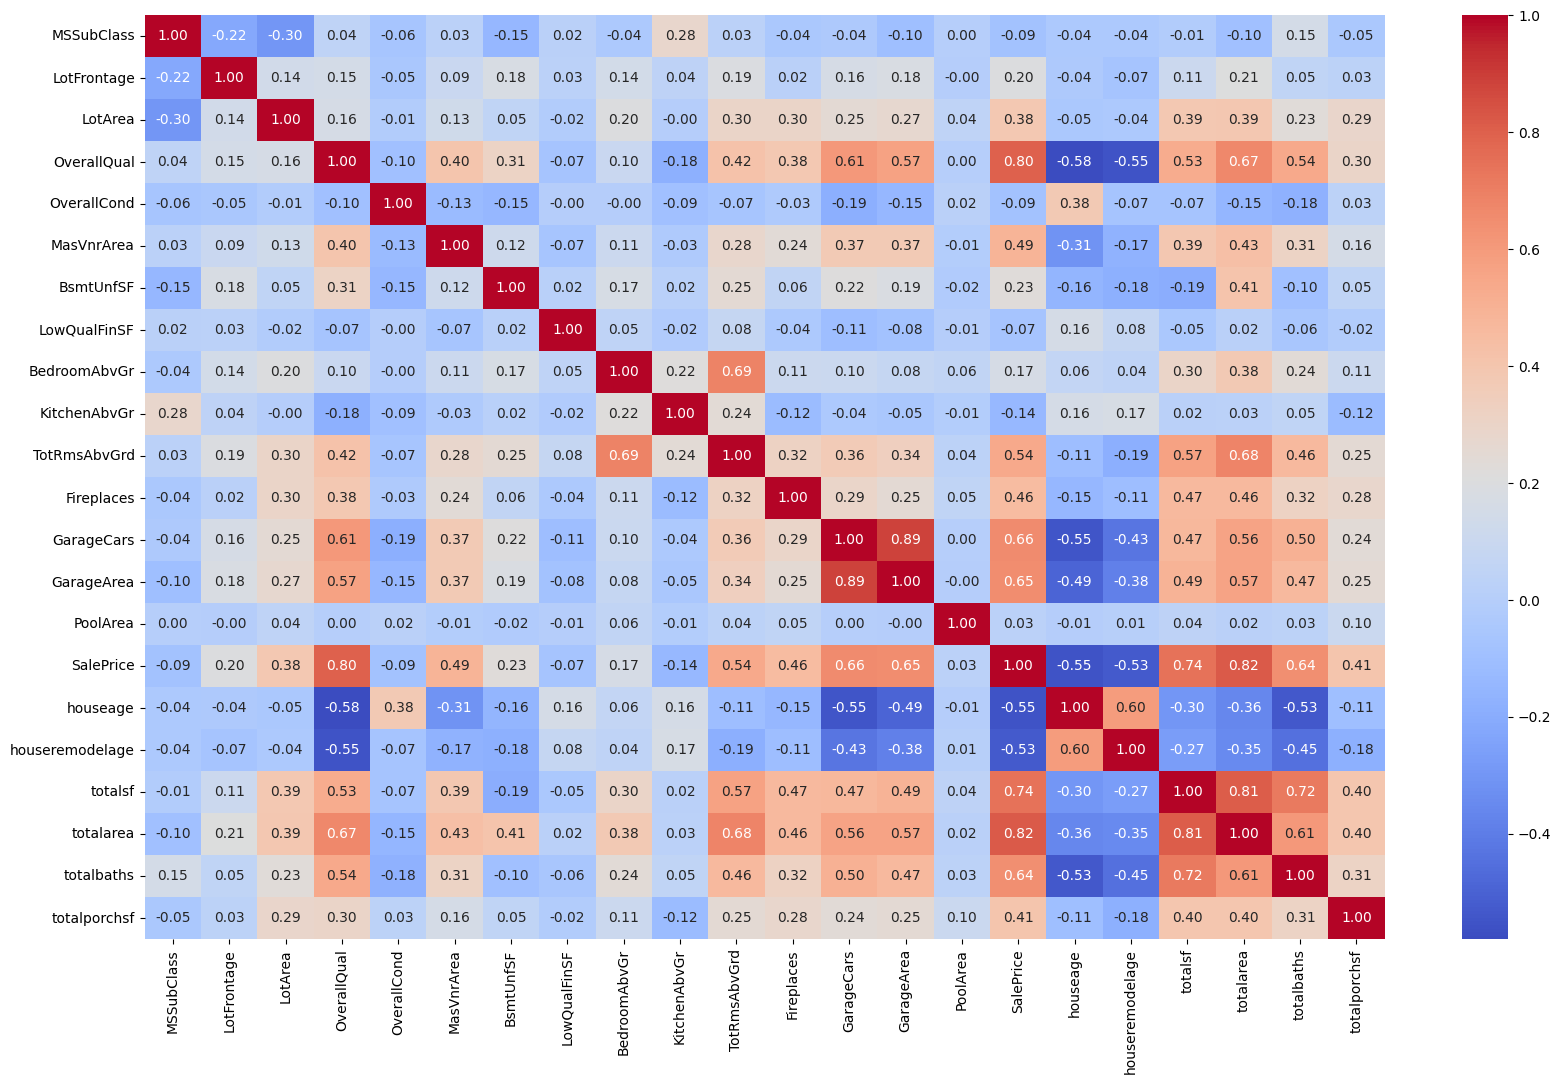

In [ ]:
# correlation_matrix = df_train.corr(numeric_only=True)
# plt.figure(figsize=(20, 12))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [ ]:
# Drop GarageCars or GarageArea
# First, examine which one has a stronger correlation with SalePrice.
# If there is a clear difference, leave the one with the stronger correlation.
# Otherwise, compare the correlation with columns other than SalePrice to determine which one to drop.
# Maybe it doesn't matter which one this time.
df_train = df_train.drop(columns=['GarageArea'])
dF_test = df_test.drop(columns=['GarageArea'])

# Logarithm Transformation
https://engineeeer.com/log-transformation/

https://keita43a.hatenablog.com/entry/2020/03/24/022038

https://communities.sas.com/t5/Blog/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E3%81%AE%E4%BB%AE%E5%AE%9A%E3%81%AE%E8%AA%A4%E8%A7%A3%E3%81%AB%E3%81%A4%E3%81%84%E3%81%A6/ba-p/495164

https://statakahiro.com/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E3%81%A8%E5%9B%9E%E5%B8%B0%E8%A8%BA%E6%96%AD%E3%81%AB%E3%81%A4%E3%81%84%E3%81%A6

https://www.sejuku.net/blog/70027#index_id1

The logarithms of numpy include log, log2, log10, and log1p. The advantage of log1p is that values less than or equal to zero can be partially computed by adding 1 to the argument.

<Axes: xlabel='SalePrice', ylabel='Count'>

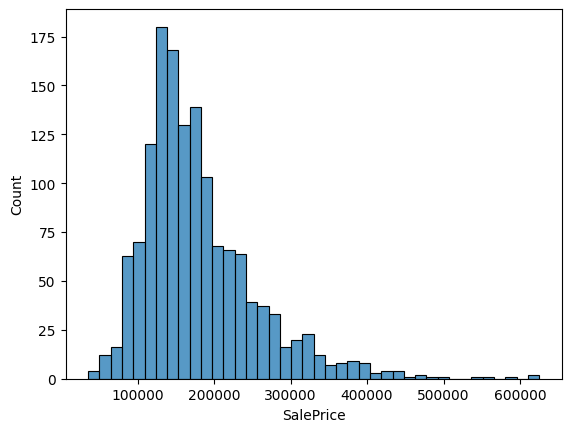

In [ ]:
# sns.histplot(df_train, x=df_train['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

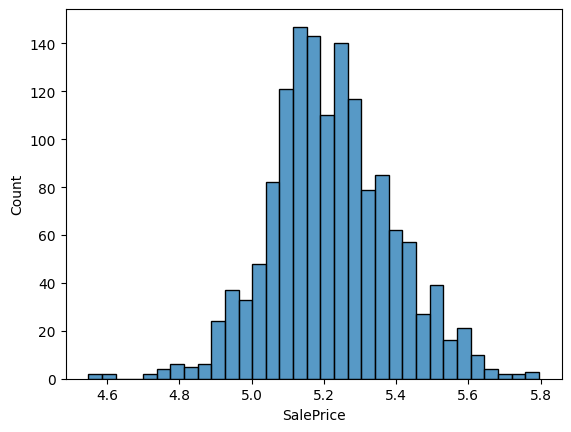

In [ ]:
# df_temp = np.log10(df_train['SalePrice'])
# sns.histplot(df_temp)

<Axes: xlabel='SalePrice', ylabel='Count'>

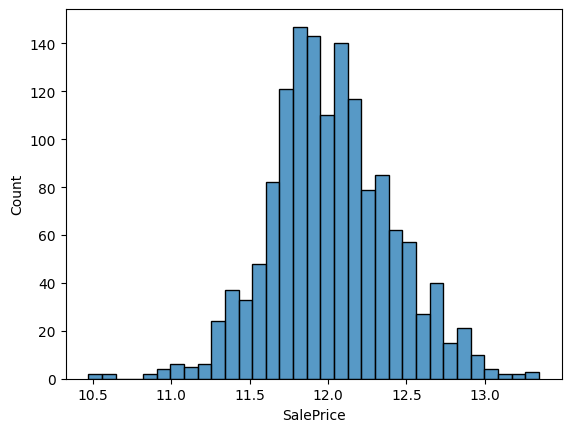

In [ ]:
# The logarithms of numpy include log, log2, log10, and log1p.
# The advantage of log1p is that values less than or equal to zero can be partially computed by adding 1 to the argument.
## df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
## sns.histplot(df_train, x=df_train['SalePrice'])
# df_temp = np.log1p(df_train['SalePrice'])
# sns.histplot(df_temp)

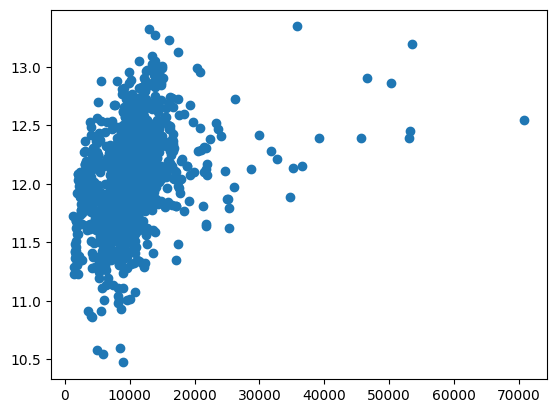

In [ ]:
# Compare with the scatter plots shown in LotArea of Numeric Data Exploration.
# That is the figure before dropping outliers, so it may not be appropriate as a comparison, though.
# plt.scatter(x='LotArea', y='SalePrice', data=df_train)

# Converting Categorical Data

In [ ]:
df_train.dtypes[df_train.dtypes == 'object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [ ]:
df_train.dtypes[df_train.dtypes != 'object']

MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
OverallCond          int64
MasVnrArea         float64
BsmtUnfSF            int64
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
PoolArea             int64
SalePrice          float64
houseage             int64
houseremodelage      int64
totalsf              int64
totalarea            int64
totalbaths         float64
totalporchsf         int64
dtype: object

## Ordinal Scale

In [ ]:
columns_ordinal = ['LotShape', 'LandContour', 'Utilities', 'LandSlope',
                   'BsmtQual', 'BsmtFinType1', 'CentralAir', 'Functional',
                   'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive',
                   'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC',
                   'ExterQual', 'BsmtCond']
print(len(columns_ordinal))

18


### Definition of Conversion Rules

In [ ]:
for column in columns_ordinal:
    print(column, list(set(df_train[column].unique()) | set(df_test[column].unique())))

LotShape ['Reg', 'IR1', 'IR3', 'IR2']
LandContour ['Lvl', 'Low', 'Bnk', 'HLS']
Utilities ['NoSeWa', 'No', 'AllPub']
LandSlope ['Gtl', 'Sev', 'Mod']
BsmtQual ['Gd', 'Ex', 'Fa', 'TA', 'No']
BsmtFinType1 ['BLQ', 'Rec', 'Unf', 'LwQ', 'GLQ', 'ALQ', 'No']
CentralAir ['N', 'Y']
Functional ['No', 'Maj2', 'Min2', 'Typ', 'Sev', 'Min1', 'Mod', 'Maj1']
FireplaceQu ['Gd', 'Ex', 'Fa', 'TA', 'Po', 'No']
GarageFinish ['RFn', 'Unf', 'Fin', 'No']
GarageQual ['Gd', 'Fa', 'Ex', 'TA', 'Po', 'No']
PavedDrive ['P', 'N', 'Y']
ExterCond ['Gd', 'Ex', 'Fa', 'TA', 'Po']
KitchenQual ['Gd', 'Ex', 'Fa', 'TA', 'No']
BsmtExposure ['Gd', 'Av', 'Mn', 'NoBsmt', 'No']
HeatingQC ['Gd', 'Ex', 'Fa', 'TA', 'Po']
ExterQual ['Gd', 'Ex', 'Fa', 'TA']
BsmtCond ['Gd', 'Fa', 'TA', 'Po', 'No']


In [ ]:
value_mappings = {'LotShape':{'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3},
                  'LandContour':{'Low':0, 'Bnk':1, 'HLS':2, 'Lvl':3},
                  'Utilities':{'No':0, 'NoSeWa':1, 'NoSewr':2, 'AllPub':3},
                  'LandSlope':{'Sev':0, 'Mod':1, 'Gtl':2},
                  'BsmtQual':{'No':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                  'BsmtFinType1':{'No':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
                  'CentralAir':{'N':0, 'Y':1},
                  'Functional':{'No':0, 'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8},
                  'FireplaceQu':{'No':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                  'GarageFinish':{'No':0, 'Unf':1, 'RFn':2, 'Fin':3},
                  'GarageQual':{'No':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                  'PavedDrive':{'N':0, 'P':1, 'Y':2},
                  'ExterCond':{'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
                  'KitchenQual':{'No':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                  'BsmtExposure':{'NoBsmt':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4},
                  'HeatingQC':{'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
                  'ExterQual':{'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
                  'BsmtCond':{'No':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}

In [ ]:
for column in columns_ordinal:
    if df_train[column].isnull().sum() != 0:
        print(str(df_train[column].isnull().sum()) + " missing values still exist in column '" + column + "' of df_train.")
    df_train[column] = df_train[column].map(value_mappings[column])

    if df_test[column].isnull().sum() != 0:
        print(str(df_test[column].isnull().sum()) + " missing values still exist in column '" + column + "' of df_test.")
    df_test[column] = df_test[column].map(value_mappings[column])

## Nominal Scale (One Hot Encoding)

In [ ]:
columns_nominal = ['Street', 'LotConfig', 'Neighborhood', 'Condition1',
                  'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                  'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                  'Electrical', 'SaleType', 'MSZoning', 'SaleCondition',
                  'Heating', 'GarageType', 'RoofMatl']
print(len(columns_nominal))

19


In [ ]:
for column in columns_nominal:
    if df_train[column].isnull().sum() != 0:
        print(str(df_train[column].isnull().sum()) + " missing values still exist in column '" + column + "' of df_train.")

    df_dummy = pd.get_dummies(df_train[column], dtype=int, drop_first=True)
    df_dummy = df_dummy.add_prefix(column + '_')
    df_train = pd.concat([df_train, df_dummy], axis = 1)
    df_train = df_train.drop(column, axis = 1)

    if df_test[column].isnull().sum() != 0:
        print(str(df_test[column].isnull().sum()) + " missing values still exist in column '" + column + "' of df_test.")

    df_dummy = pd.get_dummies(df_test[column], dtype=int, drop_first=True)
    df_dummy = df_dummy.add_prefix(column + '_')
    df_test = pd.concat([df_test, df_dummy], axis = 1)
    df_test = df_test.drop(column, axis = 1)

# Linear Multiple Regression

In [ ]:
df_train

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,60,65.0,8450,3,3,3,2,7,5,196.0,...,False,False,False,False,False,False,False,False,False,False
1,20,80.0,9600,3,3,3,2,6,8,0.0,...,False,False,False,False,False,False,False,False,False,False
2,60,68.0,11250,2,3,3,2,7,5,162.0,...,False,False,False,False,False,False,False,False,False,False
3,70,60.0,9550,2,3,3,2,7,5,0.0,...,False,False,True,False,False,False,False,False,False,False
4,60,84.0,14260,2,3,3,2,8,5,350.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,3,3,3,2,6,5,0.0,...,False,False,False,False,False,False,False,False,False,False
1456,20,85.0,13175,3,3,3,2,6,6,119.0,...,False,False,False,False,False,False,False,False,False,False
1457,70,66.0,9042,3,3,3,2,7,9,0.0,...,False,False,False,False,False,False,False,False,False,False
1458,20,68.0,9717,3,3,3,2,5,6,0.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_train = df_train.dropna(how = 'any', axis = 0)
df_train.shape

(1436, 174)

In [ ]:
xcol = list(df_train.columns)
xcol.remove('SalePrice')
# When increasing columns on a nominal scale, the column increase may be different for df_train and df_test.
xcol = list(set(xcol) & set(df_test.columns))
tcol = ['SalePrice']

print(xcol)
print(tcol)

['SaleType_New', 'MasVnrType_BrkFace', 'Neighborhood_Veenker', 'Neighborhood_Mitchel', 'HouseStyle_SFoyer', 'Exterior2nd_CBlock', 'Condition2_PosA', 'MSSubClass', 'Neighborhood_SWISU', 'totalporchsf', 'Exterior2nd_Brk Cmn', 'ExterCond', 'BedroomAbvGr', 'Exterior1st_WdShing', 'Condition1_RRNn', 'Exterior1st_VinylSd', 'PoolArea', 'HouseStyle_1Story', 'Exterior2nd_Other', 'Exterior2nd_Stucco', 'Condition1_PosN', 'Electrical_SBrkr', 'GarageType_Detchd', 'BsmtQual', 'Fireplaces', 'TotRmsAbvGrd', 'Neighborhood_Sawyer', 'RoofStyle_Shed', 'MSZoning_RM', 'LotConfig_FR2', 'houseremodelage', 'Foundation_PConc', 'Neighborhood_BrDale', 'Condition1_PosA', 'Neighborhood_OldTown', 'Foundation_CBlock', 'Neighborhood_Blueste', 'GarageCars', 'KitchenQual', 'Condition1_RRAn', 'totalbaths', 'Neighborhood_Edwards', 'LowQualFinSF', 'RoofStyle_Gambrel', 'KitchenAbvGr', 'BsmtFinType1', 'HouseStyle_SLvl', 'Neighborhood_NAmes', 'SaleType_CWD', 'Neighborhood_Crawfor', 'Neighborhood_Gilbert', 'Exterior1st_MetalSd'

## columns_elite

In [ ]:
# corrメソッドによる表のうち，'SalePrice'列のみ抽出
df_train_cor = df_train.corr(numeric_only=True)['SalePrice']

# mapメソッドにより，データを絶対値に変換
df_train_abscor = df_train_cor.map(abs)

# 降順で結果を表示
df_train_abscor.sort_values(ascending = False).head(20)

SalePrice            1.000000
OverallQual          0.819818
totalarea            0.817890
totalsf              0.739774
GarageCars           0.688476
ExterQual            0.686460
totalbaths           0.678837
KitchenQual          0.669051
BsmtQual             0.619516
GarageFinish         0.611030
houseage             0.600523
houseremodelage      0.572613
FireplaceQu          0.543049
Foundation_PConc     0.541315
TotRmsAbvGrd         0.535613
Fireplaces           0.478692
HeatingQC            0.476089
MasVnrArea           0.435325
GarageType_Attchd    0.417696
totalporchsf         0.410963
Name: SalePrice, dtype: float64

In [ ]:
# columns_elite = ['OverallQual', 'totalarea', 'totalsf', 'GarageCars',
#                  'ExterQual', 'totalbaths', 'KitchenQual', 'BsmtQual',
#                  'GarageFinish', 'houseage', 'houseremodelage', 'FireplaceQu',
#                  'Foundation', 'TotRmsAbvGrd', 'Fireplaces', 'HeatingQC']
#
# xcol_new = []
# for column in xcol:
#     for elite in columns_elite:
#         if elite in column:
#             xcol_new.append(column)
#             break
# xcol = xcol_new
# print(xcol)

In [ ]:
x_multiple = df_train[xcol]
t_multiple = df_train[tcol]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_multiple, t_multiple, test_size=0.3, random_state=0)

In [ ]:
# Creating a linear multiple regression model
model_multiple = LinearRegression()

In [ ]:
# Learning on training data
model_multiple.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Validation of coefficient of determination on test data
model_multiple.score(x_test, y_test)

0.9248815798863341

In [ ]:
# Mean absolute error on test data
pred = model_multiple.predict(x_test)

mean_absolute_error(y_pred = pred, y_true = y_test)

0.0779676328050797

In [ ]:
# Display coefficients of regression equation
print(model_multiple.coef_)

# Display the intercept of the regression equation
print(model_multiple.intercept_)

[[ 1.12654813e-01  4.24126967e-02  4.74458979e-02 -7.30315459e-02
  -1.02498196e-02 -3.32645981e-02  3.29248130e-13 -5.93137297e-04
   3.33591994e-02  1.05536280e-04 -5.53989421e-02 -9.56261220e-03
  -2.62502399e-03  3.81781352e-02  1.00213050e-01  1.98713121e-02
   3.72385225e-04 -4.37106038e-02 -1.22498910e-01 -2.92179824e-02
   6.72389102e-02 -2.80245934e-02  5.30012558e-02  6.97558665e-03
  -4.18898107e-03  9.86805619e-03 -3.36584864e-02 -1.68939347e-01
   3.28770431e-01 -4.12567060e-02 -8.24403741e-04  5.57843722e-02
  -8.89263633e-02  3.04169851e-02 -5.05146724e-02  3.64707905e-02
  -5.59982024e-02  4.14752512e-02  8.06707267e-03  2.92332932e-02
   1.47057340e-02 -6.60736160e-02 -5.85216135e-06 -4.18169031e-02
  -4.21597218e-02  3.86478327e-03  1.56722493e-02 -4.88776515e-02
  -1.75905559e-02  9.74641651e-02 -4.51329703e-02  8.00820510e-02
   5.72793612e-03  6.40775127e-02  7.40878691e-03 -1.17843925e-01
  -5.74942960e-02 -2.52259046e-02  2.69675118e-02  4.22444737e-02
  -2.57269

# Creating Submission Data

In [ ]:
df_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [ ]:
columns_input = df_test[xcol]
prediction = model_multiple.predict(columns_input)
# We can use numpy.expm1() which is the inverse of numpy.log1p().
df_submission['SalePrice'] = np.expm1(prediction)

dt_now = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))
df_submission.to_csv('/content/drive/MyDrive/practical_AI-tech/house-prices-advanced-regression-techniques/submission_' + dt_now.isoformat(timespec="seconds") + '.csv', index=False)

In [ ]:
import numpy as np
import  warnings

warnings.filterwarnings('error')

for i in range(200000):
    try:
        np.expm1(i)
    except Warning:
        print(i)
        break